## Overview of strategy


The goal is to investigate along-strike patterns in seismicity by collapsing contiguous slices of the domain into a single plane. Each hypocenter will make a point when projected in the 2d space of the plane. Each principal axis of the moment tensor will make a 2d vector when projected in the 2d space of the plane.

In practice, the way we do this is to set up a relatively dense of lines (great circle segments) that are normal to the trench, extending both landward and seaward of thr trench (by default spaced at 10 km along the trench, but this can be adjusted). 

Each of these profile lines is made up of points (lat, lon, spaced by default at 1 km). At each of these points we compute the distance from the position where the profile line intersects the trench. We also assume that these profile lines define great circle planes at depth.

The process can easily be adjusted to perform the same analyis along any azimuth (for instance the azimuth of relative plate modtion). However, as a starting point the trench-normal azimuth is used. 

Each earthquake epicenter is referenced to the closest profile line, and this allows us to map the value of distance from the trench (known at each point on the profile lines) to the set of earthquake epicenters. 

The depth of each earthquake is known at the outset from the hypocenter. These two values - depth and distance to the trench, form the basic 2d coordinates which all the data will be collapsed into. 

It is worth noting the that values of distance to the trench and depth are effectively a polar coordinate system. During the analyis these values (distance, depth) are converted to a cartesian coordinate system (x, y) which has the origin at the trench, and a vertical axis parallel to the radial vector (down) at the trench. The function `gca_radialdepth_to_cartesian` is used to perform this coordinate transformation. 


The 2d slab surface model is interpolated on the same profile lines, making a line in 2d space. For each profile line we compute the downdip distance (arc length) along the intpolated slab surface model, referenced to the trench position.

Finally each earthquake is referenced to the nearest point on the slab surface model (the projected trace of the slab model in the 2d plane prescribed by each profile line). 

This allows us to plot the earthquakes in a "slab reference system", where one axis represents the (signed) distance from the earthquake to the slab surface model and the other represents the downdip distance along the slab surface model from the trench (along the azimuth provide by the profile lines). 



## Projecting  / rotating moment tensors and vectors

When plotting the t-axes in the 2d space defined by the great circle planes, there are either 2 or 3 rotations that need to be accounted for. Note that these rotations/projections are done on the fly in the figure creation. 


First, is the rotation based in the azimuth of the plane. For instance, the following line takes a t-axis (3D vector) and returns the projected 2D vector for a given azimuth:

```python
#the first rotation deals with the azimuth of the profile line
x, y = get_projected_axis(taxislist[i], azimuth_degrees= azim_)
```

Second, is a rotation that accounts for the fact that the plots assume a cartiesian coordinate system, whereas the moment tensors and principal axes are general given in a local coordinate system (e.g. NED). What this means is we have to account for the angle between the trench and the earthquake. Taking the projected component of the vector in the great circle plane (x,y), the plotting blocks then do:


```python
#angle between the trench and the earthquake
coord_fix_angle = np.rad2deg(eq_surface_y[i]/earth_radius_km)
#build rotation matrix
TM = coord_transform_matrix_2d(coord_fix_angle)
#rotate the vector
rot_taxis =  np.einsum("ij,j ->i", TM, [x, y])
x_, y_ = rot_taxis[0], rot_taxis[1]
```

Finally, if you want to plot the T-axes in a "slab reference system", you also need to rotate accordign the the local slab dip angle. In this case, we combine this with rotation just described, as:


```python
#dip_ is the local slab dip angle 
TM = coord_transform_matrix_2d(-1.*dip_ + coord_fix_angle)
```




## Python env

This project was set up using an anaconda enviroment. 

The main dependecies, apart from pygplates, are specified in the file `py27_gdal.yml`. The environment uses Python 2 as at the time of development pygplates was only available as Python2. 


To build the conda environment run:

```
conda env create -f environment.yml
```

Then 

```
conda activate py27_gdal
```



#### Pygplates 

intructions for installing pygplates are found here:

https://www.gplates.org/docs/pygplates/pygplates_getting_started.html#installation

You will need to add the location of the shared library to the path. In the notebooks, this means updating the variable: `path_to_pygplates` 

## Japan (north Honshu) example


This example focusses on the section of subducting Pacific plate along northern Honshu. 

The analysis here is simplified as there is an existing slab model that proivides a cintinuous representation of the slan and plate both at depth, but also signficantly seaward of the trench. This is in contrast to the well-know global Slab1 and Slab2.0 models, which only represent the slab at depth, and have to be combined with bathymetry data. 

One complication of anlysing this region is that there are a cluster of normal faulting events that occurred, mainly subsecqent to teh 2011 Tohuku earthquake, in the forearc quite close to the slab surface.

The analyis in `slab_seismicity.ipynb` includes a simple approach for identifying megathrust earthquakes as well as those in the upper plate. The latter are basically defined as the events where the depth lies more that a specified distance above the slab surface model (givenm by `op_cutoff_distance`). 

However, given that the depth uncertainty of events in the ISC-EHB catalog is on the order of 10 km, there is tradeoff in trying to exclude upper plate events, and allowing for some mislocated slab earthquakes. It is recommmneded to play with the `op_cutoff_distance` paramater. 




## Conventions  / terminology

Some definitions that may be useful


#### azimuth

The code assumes that the trench azimuths are defined in such a way as they reflect the direction you would face if you were stading on the trench with the arc to your right, and the outer rise to your left. Notice that this orientation convention is reflected in the plots, which are always have the trench to the left of the arc. 


#### Rake



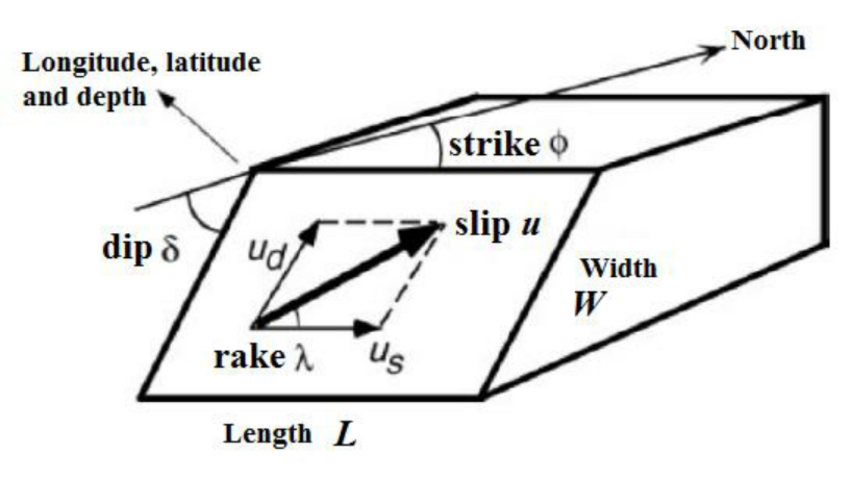

In [1]:

from IPython.display import Image
Image(filename='./figs/Fault-plane-parameter-Satake-2013.png', width=400)